In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
#from .core import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
df = pd.read_csv("StudentsPerformance.csv")

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and y Variables

In [7]:
X = df.drop(columns=['math score'],axis=1)
y =df['math score']

In [8]:
#Create Column Transformer with 3 types of tranformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)


In [9]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [12]:
#Create an evaluation function
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR":SVR(),
    "Adaboost": AdaBoostRegressor(),
    "Xgboost": XGBRegressor()
    
}
model_list =[]
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    #evaluate train and test dataset
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performance for Training set")
    print("- RMSE: {:.4f}".format(model_train_rmse))
    print("- MAE: {:.4f}".format(model_train_mae))
    print("- MSE: {:.4f}".format(model_train_mse))
    print("- R2: {:.4f}".format(model_train_r2))

    print("="*35)

    print("Model performance for Test set")
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- MAE: {:.4f}".format(model_test_mae))
    print("- MSE: {:.4f}".format(model_test_mse))
    print("- R2: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')


Linear Regression
Model performance for Training set
- RMSE: 5.3242
- MAE: 4.2682
- MSE: 28.3469
- R2: 0.8743
Model performance for Test set
- RMSE: 5.4016
- MAE: 4.2186
- MSE: 29.1774
- R2: 0.8801


Lasso
Model performance for Training set
- RMSE: 6.5938
- MAE: 5.2063
- MSE: 43.4784
- R2: 0.8071
Model performance for Test set
- RMSE: 6.5197
- MAE: 5.1579
- MSE: 42.5064
- R2: 0.8253


Ridge
Model performance for Training set
- RMSE: 5.3233
- MAE: 4.2650
- MSE: 28.3378
- R2: 0.8743
Model performance for Test set
- RMSE: 5.3904
- MAE: 4.2111
- MSE: 29.0563
- R2: 0.8806


KNN
Model performance for Training set
- RMSE: 5.7172
- MAE: 4.5270
- MSE: 32.6859
- R2: 0.8550
Model performance for Test set
- RMSE: 7.2553
- MAE: 5.6280
- MSE: 52.6388
- R2: 0.7837


Decision Tree
Model performance for Training set
- RMSE: 0.2795
- MAE: 0.0187
- MSE: 0.0781
- R2: 0.9997
Model performance for Test set
- RMSE: 7.8016
- MAE: 6.2050
- MSE: 60.8650
- R2: 0.7499


Random Forest
Model performance for Trainin

In [17]:

pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880095
7,Adaboost,0.851380
5,Random Forest,0.849338
8,Xgboost,0.827797
1,Lasso,0.825320
3,KNN,0.783681
4,Decision Tree,0.749875
6,SVR,0.728600


Linear Regression

In [19]:
linreg = LinearRegression(fit_intercept=True)
linreg = linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.01


Text(0, 0.5, 'Predicted')

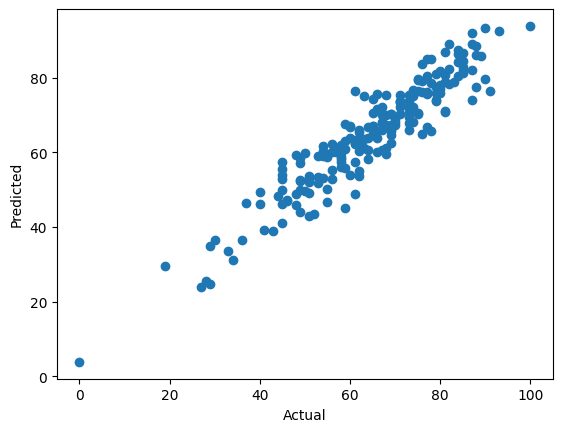

In [20]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

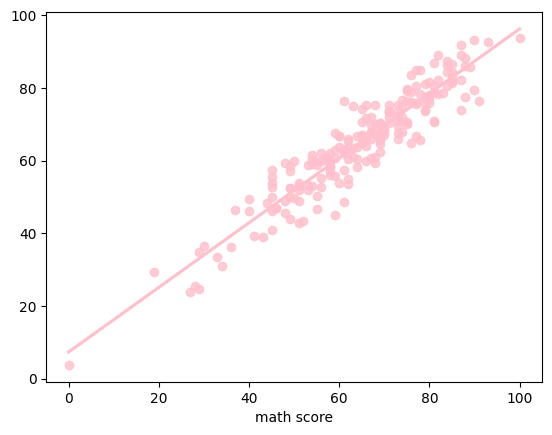

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='pink')

Diffrence between Actual and predicted value

In [22]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [23]:
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.492188,14.507812
737,53,58.976562,-5.976562
740,80,76.890625,3.109375
660,74,76.742188,-2.742188
411,84,87.500000,-3.500000
...,...,...,...
408,52,43.500000,8.500000
332,62,62.023438,-0.023438
208,74,67.992188,6.007812
613,65,67.125000,-2.125000
